In [1]:
##### Introduction and data analysis

# First performed a manual inspection of data with text editor

# Format: tweetId | tweetText | userId | imageId(s) | username | timestamp | label
# Separator of featueres: Tab
# Separator of instances: New Line
# 
# Note: http://t.co... is a link to the tweet from the observations, and is with the tweetText
#
# Example:
#    263046056240115712 | Crazy pic of #Hurricane #Sandy... http://t.co/0zrMsgvs | 31305940 | sandyA_fake_29 | SLAZARO31 | Tue Oct 30 04:04:04 +0000 2012 | fake
#
# Volume of the training set:
# 14484 entries
#
# Post quality:
# It seems that the tweets are in different languages (Spanish, Mandarin, for example)
# there are emojis
# There are quotes and source mentions
#
#

import pandas as pd
data = pd.read_csv("mediaeval-2015-trainingset.txt", sep="\t", lineterminator='\n', skiprows=(0),  header=(0))
# Source: https://stackoverflow.com/questions/27896214/reading-tab-delimited-file-with-pandas-works-on-windows-but-not-on-mac



In [2]:
data.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     14277 non-null  int64 
 1   tweetText   14277 non-null  object
 2   userId      14277 non-null  int64 
 3   imageId(s)  14277 non-null  object
 4   username    14277 non-null  object
 5   timestamp   14277 non-null  object
 6   label       14277 non-null  object
dtypes: int64(2), object(5)
memory usage: 780.9+ KB


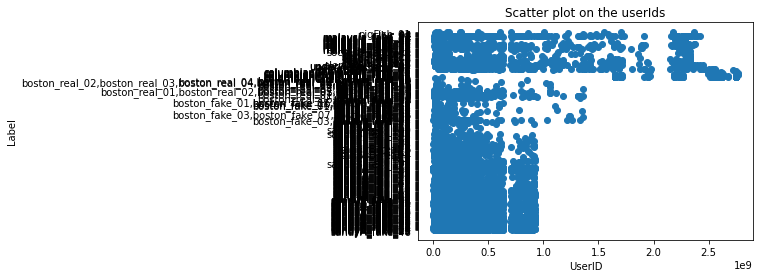

In [4]:
# Data viz
import matplotlib.pyplot as plt
plt.scatter(data['userId'], data['imageId(s)'])
plt.xlabel('UserID')
plt.ylabel('Label')
plt.title('Scatter plot on the userIds')
plt.show()

In [6]:
# Preprocessing
#Source: https://towardsdatascience.com/natural-language-processing-nlp-for-machine-learning-d44498845d5b

import nltk
#nltk.download()

simpleData = data[['tweetText']]
simpleData.head(55)

,tweetText
0,¿Se acuerdan de la película: “El día después d...
1,@milenagimon: Miren a Sandy en NY! Tremenda i...
2,"Buena la foto del Huracán Sandy, me recuerda a..."
3,Scary shit #hurricane #NY http://t.co/e4JLBUfH
4,My fave place in the world #nyc #hurricane #sa...
5,42nd #time #square #NYC #subway #hurricane htt...
6,Just in time for #halloween a photo of #hurric...
7,Crazy pic of #Hurricane #Sandy prayers go out ...
8,#sandy #newyork #hurricane #statueofliberty #U...
9,#nyc #hurricane http://t.co/Gv3QxZlq


In [7]:
# 1. Remove punctuation
import string
string.punctuation
myPunct = '¿'.join(string.punctuation)

In [8]:
# Creating a function that would remove punctuation
def clearPunctuation(text):
    new_text = "".join([char for char in text if char not in myPunct])
    return new_text

data['clean_tweets'] = data['tweetText'].apply(clearPunctuation)#(lambda x: clearPunctuation(x))

In [9]:
simpleData = data[['tweetText', 'clean_tweets']]
simpleData.head(15)

,tweetText,clean_tweets
0,¿Se acuerdan de la película: “El día después d...,Se acuerdan de la película “El día después de ...
1,@milenagimon: Miren a Sandy en NY! Tremenda i...,milenagimon Miren a Sandy en NY Tremenda imag...
2,"Buena la foto del Huracán Sandy, me recuerda a...",Buena la foto del Huracán Sandy me recuerda a ...
3,Scary shit #hurricane #NY http://t.co/e4JLBUfH,Scary shit hurricane NY httptcoe4JLBUfH
4,My fave place in the world #nyc #hurricane #sa...,My fave place in the world nyc hurricane sandy...
5,42nd #time #square #NYC #subway #hurricane htt...,42nd time square NYC subway hurricane httptcod...
6,Just in time for #halloween a photo of #hurric...,Just in time for halloween a photo of hurrican...
7,Crazy pic of #Hurricane #Sandy prayers go out ...,Crazy pic of Hurricane Sandy prayers go out to...
8,#sandy #newyork #hurricane #statueofliberty #U...,sandy newyork hurricane statueofliberty USA ht...
9,#nyc #hurricane http://t.co/Gv3QxZlq,nyc hurricane httptcoGv3QxZlq


In [10]:
# 2. Lower Casing
# Source: https://towardsdatascience.com/text-preprocessing-for-data-scientist-3d2419c8199d
import re
#import spacy

data['lower_tweets'] = data['clean_tweets'].str.lower()

In [11]:
simpleData = data[['clean_tweets', 'lower_tweets']]
simpleData.head(15)

,clean_tweets,lower_tweets
0,Se acuerdan de la película “El día después de ...,se acuerdan de la película “el día después de ...
1,milenagimon Miren a Sandy en NY Tremenda imag...,milenagimon miren a sandy en ny tremenda imag...
2,Buena la foto del Huracán Sandy me recuerda a ...,buena la foto del huracán sandy me recuerda a ...
3,Scary shit hurricane NY httptcoe4JLBUfH,scary shit hurricane ny httptcoe4jlbufh
4,My fave place in the world nyc hurricane sandy...,my fave place in the world nyc hurricane sandy...
5,42nd time square NYC subway hurricane httptcod...,42nd time square nyc subway hurricane httptcod...
6,Just in time for halloween a photo of hurrican...,just in time for halloween a photo of hurrican...
7,Crazy pic of Hurricane Sandy prayers go out to...,crazy pic of hurricane sandy prayers go out to...
8,sandy newyork hurricane statueofliberty USA ht...,sandy newyork hurricane statueofliberty usa ht...
9,nyc hurricane httptcoGv3QxZlq,nyc hurricane httptcogv3qxzlq


In [12]:
# 3. Stop-word removal
from nltk.corpus import stopwords
stopword_set = set(stopwords.words('english'))

#Remove stopwords
def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopword_set])

data['nostop_tweets'] = data['lower_tweets'].apply(stopwords)

simpleData = data[['clean_tweets', 'nostop_tweets']]
simpleData.head(15)

,clean_tweets,nostop_tweets
0,Se acuerdan de la película “El día después de ...,se acuerdan de la película “el día después de ...
1,milenagimon Miren a Sandy en NY Tremenda imag...,milenagimon miren sandy en ny tremenda imagen ...
2,Buena la foto del Huracán Sandy me recuerda a ...,buena la foto del huracán sandy recuerda la pe...
3,Scary shit hurricane NY httptcoe4JLBUfH,scary shit hurricane ny httptcoe4jlbufh
4,My fave place in the world nyc hurricane sandy...,fave place world nyc hurricane sandy statueofl...
5,42nd time square NYC subway hurricane httptcod...,42nd time square nyc subway hurricane httptcod...
6,Just in time for halloween a photo of hurrican...,time halloween photo hurricane sandy frankenst...
7,Crazy pic of Hurricane Sandy prayers go out to...,crazy pic hurricane sandy prayers go family fr...
8,sandy newyork hurricane statueofliberty USA ht...,sandy newyork hurricane statueofliberty usa ht...
9,nyc hurricane httptcoGv3QxZlq,nyc hurricane httptcogv3qxzlq


In [13]:
# 4. Common Word Removal
from collections import Counter
cnt = Counter()
for text in data['nostop_tweets'].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(20)

[('sandy', 10740),
 ('hurricane', 2927),
 ('hurricanesandy', 1613),
 ('rt', 1571),
 ('nyc', 1491),
 ('new', 1470),
 ('de', 1246),
 ('york', 893),
 ('photo', 860),
 ('la', 696),
 ('jersey', 688),
 ('ny', 644),
 ('shark', 556),
 ('newyork', 551),
 ('via', 533),
 ('tomb', 526),
 ('real', 507),
 ('cover', 496),
 ('en', 483),
 ('unknown', 467)]

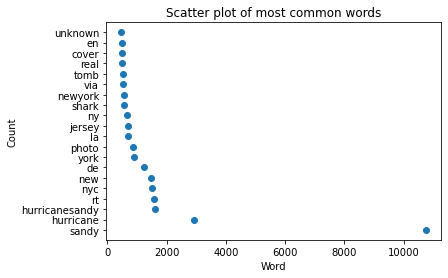

In [14]:
# Visualize most common words
words = [x[0] for x in cnt.most_common(20)]
count = [x[1] for x in cnt.most_common(20)]

# Data viz
plt.scatter(count, words)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Scatter plot of most common words')
plt.show()

In [15]:
# Now the source says it is useful to remove common worlds from text data. It is clear that those words are important, e.g. Sandy, hurricane, nyc ...

# Remove common words
freq = set([W for (W,WC) in cnt.most_common(10)])

def remFreq(text):
    return " ".join([word for word in str(text).split() if word not in freq])

data['common_tweets'] = data['nostop_tweets'].apply(remFreq)

simpleData = data[['clean_tweets', 'common_tweets']]
simpleData.head(15)


,clean_tweets,common_tweets
0,Se acuerdan de la película “El día después de ...,se acuerdan película “el día después mañana” r...
1,milenagimon Miren a Sandy en NY Tremenda imag...,milenagimon miren en ny tremenda imagen del hu...
2,Buena la foto del Huracán Sandy me recuerda a ...,buena foto del huracán recuerda película día i...
3,Scary shit hurricane NY httptcoe4JLBUfH,scary shit ny httptcoe4jlbufh
4,My fave place in the world nyc hurricane sandy...,fave place world statueofliberty 🗽 httptcoex61...
5,42nd time square NYC subway hurricane httptcod...,42nd time square subway httptcodax5yy7x
6,Just in time for halloween a photo of hurrican...,time halloween frankenstorm httptcoxqukb4vn
7,Crazy pic of Hurricane Sandy prayers go out to...,crazy pic prayers go family friends east coast...
8,sandy newyork hurricane statueofliberty USA ht...,newyork statueofliberty usa httptcoiqfebo1e
9,nyc hurricane httptcoGv3QxZlq,httptcogv3qxzlq


In [16]:
# Rare word removal
freq = pd.Series(' '.join(data['common_tweets']).split()).value_counts()[-10:] # 10 rare words
freq = list(freq.index)
data['rare_tweets'] = data['common_tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

simpleData = data[['clean_tweets', 'rare_tweets']]
simpleData.head(15)

,clean_tweets,rare_tweets
0,Se acuerdan de la película “El día después de ...,se acuerdan película “el día después mañana” r...
1,milenagimon Miren a Sandy en NY Tremenda imag...,milenagimon miren en ny tremenda imagen del hu...
2,Buena la foto del Huracán Sandy me recuerda a ...,buena foto del huracán recuerda película día i...
3,Scary shit hurricane NY httptcoe4JLBUfH,scary shit ny httptcoe4jlbufh
4,My fave place in the world nyc hurricane sandy...,fave place world statueofliberty 🗽 httptcoex61...
5,42nd time square NYC subway hurricane httptcod...,42nd time square subway httptcodax5yy7x
6,Just in time for halloween a photo of hurrican...,time halloween frankenstorm httptcoxqukb4vn
7,Crazy pic of Hurricane Sandy prayers go out to...,crazy pic prayers go family friends east coast...
8,sandy newyork hurricane statueofliberty USA ht...,newyork statueofliberty usa httptcoiqfebo1e
9,nyc hurricane httptcoGv3QxZlq,httptcogv3qxzlq


In [32]:
# Spelling Correction
from textblob import TextBlob

data['rare_tweets'][:15].apply(lambda x: str(TextBlob(x).correct()))

simpleData = data[['clean_tweets', 'rare_tweets']]
simpleData.head(15)

,clean_tweets,rare_tweets
0,Se acuerdan de la película “El día después de ...,se acuerdan película “el día después mañana” r...
1,milenagimon Miren a Sandy en NY Tremenda imag...,milenagimon miren en ny tremenda imagen del hu...
2,Buena la foto del Huracán Sandy me recuerda a ...,buena foto del huracán recuerda película día i...
3,Scary shit hurricane NY httptcoe4JLBUfH,scary shit ny httptcoe4jlbufh
4,My fave place in the world nyc hurricane sandy...,fave place world statueofliberty httptcoex61dozk
5,42nd time square NYC subway hurricane httptcod...,42nd time square subway httptcodax5yy7x
6,Just in time for halloween a photo of hurrican...,time halloween frankenstorm httptcoxqukb4vn
7,Crazy pic of Hurricane Sandy prayers go out to...,crazy pic prayers go family friends east coast...
8,sandy newyork hurricane statueofliberty USA ht...,newyork statueofliberty usa httptcoiqfebo1e
9,nyc hurricane httptcoGv3QxZlq,httptcogv3qxzlq


In [33]:
# Emoji removal
#from emot.emo_unicode import UNICODE_EMO

def emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\U0001F5FD"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

data['rare_tweets'] = data['rare_tweets'].apply(emoji)



simpleData = data[['clean_tweets', 'rare_tweets']]
simpleData.head(15)

,clean_tweets,rare_tweets
0,Se acuerdan de la película “El día después de ...,se acuerdan película “el día después mañana” r...
1,milenagimon Miren a Sandy en NY Tremenda imag...,milenagimon miren en ny tremenda imagen del hu...
2,Buena la foto del Huracán Sandy me recuerda a ...,buena foto del huracán recuerda película día i...
3,Scary shit hurricane NY httptcoe4JLBUfH,scary shit ny httptcoe4jlbufh
4,My fave place in the world nyc hurricane sandy...,fave place world statueofliberty httptcoex61dozk
5,42nd time square NYC subway hurricane httptcod...,42nd time square subway httptcodax5yy7x
6,Just in time for halloween a photo of hurrican...,time halloween frankenstorm httptcoxqukb4vn
7,Crazy pic of Hurricane Sandy prayers go out to...,crazy pic prayers go family friends east coast...
8,sandy newyork hurricane statueofliberty USA ht...,newyork statueofliberty usa httptcoiqfebo1e
9,nyc hurricane httptcoGv3QxZlq,httptcogv3qxzlq


In [35]:
# Remove urls

def remove_url(text):
    url_pattern = re.compile(r'http\S+')
    return url_pattern.sub(r'', text)

data['rare_tweets'] = data['rare_tweets'].apply(remove_url)

simpleData = data[['clean_tweets', 'rare_tweets']]
simpleData.head(15)

,clean_tweets,rare_tweets
0,Se acuerdan de la película “El día después de ...,se acuerdan película “el día después mañana” r...
1,milenagimon Miren a Sandy en NY Tremenda imag...,milenagimon miren en ny tremenda imagen del hu...
2,Buena la foto del Huracán Sandy me recuerda a ...,buena foto del huracán recuerda película día i...
3,Scary shit hurricane NY httptcoe4JLBUfH,scary shit ny tcoe4jlbufh
4,My fave place in the world nyc hurricane sandy...,fave place world statueofliberty tcoex61dozk
5,42nd time square NYC subway hurricane httptcod...,42nd time square subway tcodax5yy7x
6,Just in time for halloween a photo of hurrican...,time halloween frankenstorm tcoxqukb4vn
7,Crazy pic of Hurricane Sandy prayers go out to...,crazy pic prayers go family friends east coast...
8,sandy newyork hurricane statueofliberty USA ht...,newyork statueofliberty usa tcoiqfebo1e
9,nyc hurricane httptcoGv3QxZlq,tcogv3qxzlq
